In [14]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import glob


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
paths = glob.glob('../output/Pred/*')
path = paths[0]

/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


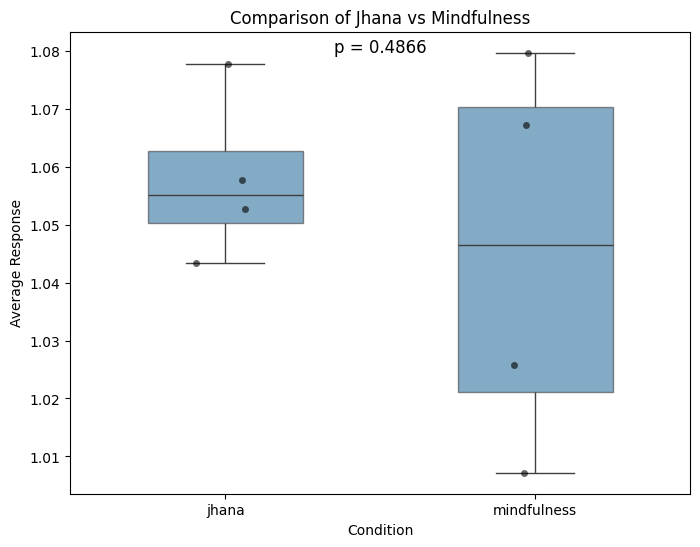

In [15]:
# Load the CSV file into a DataFrame
file_path = "your_file_path_here.csv"  # Replace with your actual file path
df = pd.read_csv(path)

# Ensure correct data types
df['sub'] = df['sub'].astype(str)
df['day'] = df['day'].astype(str)
df['condition'] = df['condition'].astype(str)

# Compute the mean across the 32 columns per row
numeric_columns = [str(i) for i in range(32)]
df['average'] = df[numeric_columns].mean(axis=1)

# ----- HIERARCHICAL LINEAR MODEL -----
# Mixed Effects Model: 'average' ~ 'condition' + (1 | sub)
model = smf.mixedlm("average ~ condition", df, groups=df["sub"], re_formula="~1")
result = model.fit()

# Get p-value
p_value = result.pvalues["condition[T.mindfulness]"]  # p-value for condition difference

# ----- PLOT: Boxplot with Individual Points -----
plt.figure(figsize=(8, 6))
sns.boxplot(x="condition", y="average", data=df, width=0.5, showfliers=False, boxprops=dict(alpha=0.6))
sns.stripplot(x="condition", y="average", data=df, jitter=True, alpha=0.6, color='black')

# Add p-value text
plt.text(0.5, df["average"].max(), f'p = {p_value:.4f}', ha='center', fontsize=12)

# Labels
plt.xlabel("Condition")
plt.ylabel("Average Response")
plt.title("Comparison of Jhana vs Mindfulness")

plt.show()
